In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

In [2]:
df = pd.read_csv("A:\My project\Behavioral-Analytics-of-Introverts-vs-Extroverts\Data_preprocessing\cleaned_personality_behavior.csv")

In [3]:
introverts = df[df['Personality'] == 'Introvert']
extroverts = df[df['Personality'] == 'Extrovert']

In [5]:
traits = ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
          'Going_outside', 'Drained_after_socializing', 
          'Friends_circle_size', 'Post_frequency']
numeric_traits = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
grouped_stats = df.groupby('Personality')[numeric_traits].agg(['mean', 'median', 'std', 'min', 'max'])
grouped_stats

Time_spent_Alone                              \
                        mean median       std  min   max   
Personality                                                
Extrovert           1.763924    2.0  1.487048  0.0  11.0   
Introvert           6.757720    7.0  2.827173  0.0  11.0   

            Social_event_attendance                              ...  \
                               mean median       std  min   max  ...   
Personality                                                      ...   
Extrovert                  6.315205    6.0  1.990688  0.0  10.0  ...   
Introvert                  2.218860    2.0  1.899031  0.0  10.0  ...   

            Friends_circle_size                             Post_frequency  \
                           mean median       std  min   max           mean   
Personality                                                                  
Extrovert              9.541572    9.0  3.280161  0.0  15.0       6.050515   
Introvert              3.611399    3.0  2.833932  0.0  15.0       1.953368   

                                         
            median       std  min   max  
Personality                              
Extrovert      6.0  2.176962  0.0  10.0  
Introvert      2.0  1.945170  0.0  10.0  

[2 rows x 25 columns]

C:\Users\aruna\AppData\Local\Temp\ipykernel_19328\1357650014.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Personality', y=col, palette='pastel', errorbar='sd')
C:\Users\aruna\AppData\Local\Temp\ipykernel_19328\1357650014.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Personality', y=col, palette='pastel', errorbar='sd')
C:\Users\aruna\AppData\Local\Temp\ipykernel_19328\1357650014.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Personality', y=col, palette='pastel', errorbar='sd')
C:\Users\a

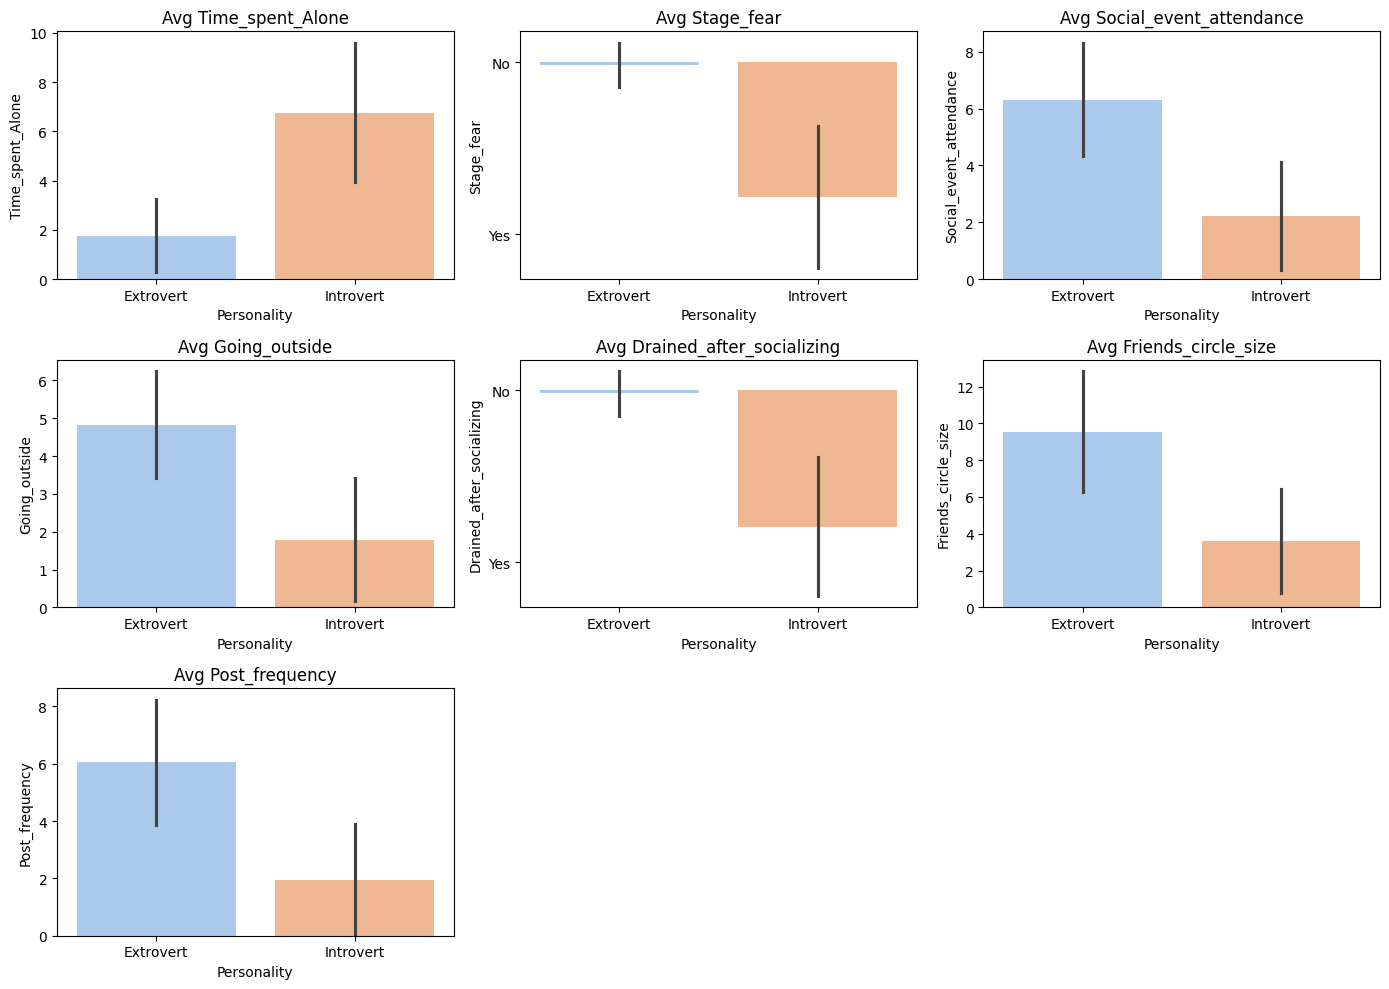

In [6]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(traits):
    plt.subplot(3, 3, i+1)
    sns.barplot(data=df, x='Personality', y=col, palette='pastel', errorbar='sd')
    plt.title(f'Avg {col}')
    plt.tight_layout()

In [8]:
from scipy.stats import chi2_contingency

print("T-test Results:\n")
for col in traits:
    if col in numeric_traits:
        stat, p = ttest_ind(introverts[col], extroverts[col], equal_var=False)
    else:
        # For categorical traits, use chi-squared test or similar
        contingency = pd.crosstab(df['Personality'], df[col])
        stat, p, _, _ = chi2_contingency(contingency)
    print(f"{col}: p-value = {p:.4f} {'(Significant)' if p < 0.05 else '(Not Significant)'}")

T-test Results:

Time_spent_Alone: p-value = 0.0000 (Significant)
Stage_fear: p-value = 0.0000 (Significant)
Social_event_attendance: p-value = 0.0000 (Significant)
Going_outside: p-value = 0.0000 (Significant)
Drained_after_socializing: p-value = 0.0000 (Significant)
Friends_circle_size: p-value = 0.0000 (Significant)
Post_frequency: p-value = 0.0000 (Significant)
